In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importando bibliotecas para buscar arquivos.

In [ ]:
import re
import os
import shutil
from random import sample

###Criando funções para obter os nomes das imagens.

In [ ]:
object_names = [] #Lista para guardar os nomes das imagens.
main_folder = r'../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99' #Caminho para a pasta das imagens.

#Função para percorrer a pasta das imagens e salvar os arquivos .png numa lista contendo seus nomes.
def file_loop(root, dirs, files, object_names):
    for file in sorted(files):
        if not re.search(r'\.png$', file):
            continue
        object_names.append(file)

#Função auxiliar para caminhar por diretórios
def main_loop(object_names):
    for root, dirs, files in os.walk(main_folder):
        file_loop(root, dirs, files, object_names)

###Povoando a lista dos nomes das imagens.

In [ ]:
main_loop(object_names)
print(object_names)

['animal1.png', 'animal10.png', 'animal11.png', 'animal2.png', 'animal3.png', 'animal4.png', 'animal5.png', 'animal6.png', 'animal7.png', 'animal8.png', 'animal9.png', 'bunny04.png', 'bunny1.png', 'bunny10.png', 'bunny2.png', 'bunny3.png', 'bunny4.png', 'bunny5.png', 'bunny6.png', 'bunny7.png', 'bunny8.png', 'bunny9.png', 'dude0.png', 'dude1.png', 'dude10.png', 'dude11.png', 'dude12.png', 'dude2.png', 'dude4.png', 'dude5.png', 'dude6.png', 'dude7.png', 'dude8.png', 'fgen1.png', 'fgen1ap.png', 'fgen1bp.png', 'fgen1ep.png', 'fgen1fp.png', 'fgen2.png', 'fgen2dp.png', 'fgen2fp.png', 'fgen3.png', 'fgen3bp.png', 'fgen5cp.png', 'fish1.png', 'fish14.png', 'fish2.png', 'fish23.png', 'fish28.png', 'fish3.png', 'fish30.png', 'fish4.png', 'fish5.png', 'fish6.png', 'fish7.png', 'hand.png', 'hand2.png', 'hand2occ1.png', 'hand2occ2.png', 'hand2occ3.png', 'hand3.png', 'hand90.png', 'handbent1.png', 'handbent2.png', 'handdeform.png', 'handdeform2.png', 'harrier.png', 'harrier1.png', 'harrier2.png', 'ha

###Importando função para buscar o conteúdo das imagens. 

In [ ]:
from glob import glob

In [ ]:
files = sorted(glob(r'../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/*.png')) #Armazena as imagens na lista files.
print(files)

['../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal1.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal10.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal11.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal2.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal3.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal4.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal5.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal6.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal7.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal8.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/animal9.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/bunny04.png', '../content/drive/MyDrive/Exemplos CBIR/ExemploCBIR/kimia99/bunny1.png', '../content/drive/MyDrive/Exemplos C

###Importando bibliotecas e lendo imagens na escala de cinza.

In [ ]:
import matplotlib.pyplot as plt
import skimage.io

for i in range(0, len(files)):
  files[i] = skimage.io.imread(str(files[i]),as_gray=True)

###Importando bibliotecas para pegar contornos das formas e trabalhar com matrizes.

In [ ]:
from skimage.measure import find_contours
import numpy as np

contour = [] #Lista para armazenar as coordenadas dos pixels de contorno.
cx = [] #Lista com as coordenadas x do centro das formas.
cy = [] #Lista com as coordenadas y do centro das formas.

#Pegando os contornos de cada forma e os centros das mesmas.
for i in range(0, len(files)):
    contour.append(find_contours(files[i], level=0))
    contour[i] = np.array(contour[i][0])
    cx.append(contour[i][:,0].mean()) 
    cy.append(contour[i][:,1].mean())

#Tratando alguns erros:

In [ ]:
contour.pop(4) #Retirei o quinto contorno porque ele ficou errado

array([[10., 23.],
       [11., 23.],
       [10., 23.]])

In [ ]:
files.pop(4)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

#Gerando as MTDs:

In [ ]:
import math

In [ ]:
MTDs = []
for t in range (len(contour)):
  forma = []
  forma = contour[t]
  N = len(forma)
  Ts = math.floor(math.log2(N/2)) #Número de escalas dos triângulos
  alfa = np.zeros(Ts)
  beta = np.zeros(Ts)
  gama = np.zeros(Ts)
  alfa_aux = np.zeros(Ts)
  beta_aux = np.zeros(Ts)
  gama_aux = np.zeros(Ts)
  for i in range(N): #Percorrer os N pontos de contorno
    for k in range(Ts): #Percorrer as Ts escalas
      d = 2**k #Distância entre os vértices do triângulo
      pi_left = forma[(i-d)%N] #O vértice esquerdo do triângulo
      pi_right = forma[(i+d)%N] #O vértice direito do triângulo
      pi_centerx = forma[i][0] #Coordenada x do vértice central do triângulo
      pi_centery = forma[i][1] #Coordenada y do vértice central do triângulo
      pi_leftx = pi_left[0] #Coordenada x do vértice esquerdo do triângulo
      pi_lefty = pi_left[1] #Coordenada y do vértice esquerdo do triângulo
      pi_rightx = pi_right[0] #Coordenada x do vértice direito do triângulo
      pi_righty = pi_right[1] #Coordenada y do vértice direito do triângulo
      centroidx = (pi_centerx + pi_leftx + pi_rightx)/3.0 #Coordenada x do centróide do triângulo
      centroidy = (pi_centery + pi_lefty + pi_righty)/3.0 #Coordenada y do centróide do triângulo
      gama_aux[k] = math.sqrt((pi_centerx - centroidx)**2 + (pi_centery - centroidy)**2) #Valor de gama para o i-ésimo ponto considerando o k-ésimo triângulo
      tsa = 0.5*(pi_rightx*pi_lefty + pi_leftx*pi_centery + pi_centerx*pi_righty 
              - pi_centerx*pi_lefty - pi_rightx*pi_centery - pi_leftx*pi_righty) #Cálculo da área do k-ésimo triângulo relativo ao i-ésimo ponto do contorno t
      if(tsa >= 0): #Verificar se a área do triângulo dada pelo determinante é positiva ou nula
        alfa_aux[k] = tsa #Valor de alfa para o i-ésimo ponto considerando o k-ésimo triângulo
        beta_aux[k] = 1 #Valor de beta para o i-ésimo ponto considerando o k-ésimo triângulo
      else: #Caso o determinante seja negativo
        alfa_aux[k] = -tsa #Valor de alfa para o i-ésimo ponto considerando o k-ésimo triângulo
        beta_aux[k] = 0 #Valor de beta para o i-ésimo ponto considerando o k-ésimo triângulo
    #Fim - for k in range(Ts):
    max_alfa = max(alfa_aux)
    max_gama = max(gama_aux)
    if(max_alfa == 0):
      max_alfa += 0.00001
    if(max_gama == 0):
      max_gama += 0.00001
    alfa_aux = alfa_aux/max_alfa #Normalização do vetor alfa
    gama_aux = gama_aux/max_gama #Normalização do vetor gama
    alfa = np.vstack([alfa, alfa_aux]) #Concatenando todos os arrays de alfas
    beta = np.vstack([beta, beta_aux]) #Concatenando todos os arrays de betas
    gama = np.vstack([gama, gama_aux]) #Concatenando todos os arrays de gamas
  #Fim - for i in range(N): 
  alfa = np.delete(alfa, (0), axis=0) #Deleta o primeiro array de alfas que é nulo
  beta = np.delete(beta, (0), axis=0) #Deleta o primeiro array de betas que é nulo
  gama = np.delete(gama, (0), axis=0) #Deleta o primeiro array de gamas que é nulo
  alfa = np.abs(np.fft.fft(alfa, axis=1)) #FFT em alfa
  beta = np.abs(np.fft.fft(beta, axis=1)) #FFT em beta 
  gama = np.abs(np.fft.fft(gama, axis=1)) #FFT em gama 
  alfa = alfa[0:5]
  beta = beta[0:5]
  gama = gama[0:5]
  MTD = [] #Lista para colocar MTDs particulares, com seus valores de alfa, beta e gama
  MTD.append(alfa) 
  MTD.append(beta)
  MTD.append(gama)
  MTDs.append(MTD) #Lista que conterá, no fim do laço, todas as MTDs dos contornos
#Fim - for t in range (len(contour)):

#Verificando como ficou a matriz de MTDs:

In [ ]:
len(MTDs[0][0]) #MTD : 98 MTDs de 3x5(M):5(Ts)

5

In [ ]:
type(MTDs[0][0])

numpy.ndarray

In [ ]:
MTDs[0][0].shape

(5, 7)

In [ ]:
print(Ts)

6


In [ ]:
print(alfa)

[[1.95480226 1.28129066 0.71107929 0.62146893 0.71107929 1.28129066]
 [1.75977654 1.21452822 0.7571636  0.67597765 0.7571636  1.21452822]
 [1.99350649 1.32364042 0.74233589 0.51298701 0.74233589 1.32364042]
 [1.84810127 1.26634483 0.73980276 0.62025316 0.73980276 1.26634483]
 [1.63451777 1.13967022 0.8159336  0.7106599  0.8159336  1.13967022]]


In [ ]:
print(MTDs[97][0])

[[1.95480226 1.28129066 0.71107929 0.62146893 0.71107929 1.28129066]
 [1.75977654 1.21452822 0.7571636  0.67597765 0.7571636  1.21452822]
 [1.99350649 1.32364042 0.74233589 0.51298701 0.74233589 1.32364042]
 [1.84810127 1.26634483 0.73980276 0.62025316 0.73980276 1.26634483]
 [1.63451777 1.13967022 0.8159336  0.7106599  0.8159336  1.13967022]]


#Exemplo do cálculo de sdist(A, B):
##Nesse caso consideramos MTD(A) = MTDs[0] e MTD(B) = MTDs[1].
##É importante notar que para k inteiro ∈ \{0, 97\}, $$MTDs[k][0] = α^{`k}; MTDs[k][1] = β^{`k}; MTDs[k][2] = γ^{`k}$$
#A fórmula descrita a seguir é empregada na próxima célula de código:
$$\mathrm{sdist(A,B)} = w_1*(|α^{`A}-α^{`B}|) + w_2*(|β^{`A}-β^{`B}|) + w_3*(|γ^{`A}-γ^{`B}|)$$

In [ ]:
sdist_AB = 1*(np.abs(MTDs[0][0] - MTDs[1][0])) + 0.9*(np.abs(MTDs[0][1] - MTDs[1][1])) 
+ 1.2*(np.abs(MTDs[0][2] - MTDs[1][2])) #sdist(A, B) Obs: Mais a frente calcularei a diferença entre as matrizes com fastdtw
#1*(np.abs(fastdtw(a[0], b[0])[0])) + 0.9*(np.abs(fastdtw(a[1], b[1])[0])) + 1.2*(np.abs(fastdtw(a[2], b[2])[0]))

array([[0.1631662 , 0.06038368, 0.08995147, 0.06465723, 0.06465723,
        0.08995147, 0.06038368],
       [0.18957492, 0.08064707, 0.09314184, 0.07328267, 0.07328267,
        0.09314184, 0.08064707],
       [0.23726225, 0.14377618, 0.07692712, 0.05719834, 0.05719834,
        0.07692712, 0.14377618],
       [0.21020536, 0.18282179, 0.08904787, 0.06234754, 0.06234754,
        0.08904787, 0.18282179],
       [0.22057068, 0.24993819, 0.09048232, 0.01578433, 0.01578433,
        0.09048232, 0.24993819]])

###Matriz de distâncias usando a fórmula dada no artigo e a DTW:

In [ ]:
from fastdtw import fastdtw 

In [ ]:
n = len(MTDs)
distance_matrix = np.zeros((n,n)) #Matriz de distâncias.
for i,a in zip(np.arange(n), MTDs):
  for j,b in zip(np.arange(i,n), MTDs[i:]):
    distance_matrix[i,j] = 2*(np.abs(fastdtw(a[0].T, b[0].T)[0])) + (np.abs(fastdtw(a[1].T, b[1].T)[0])) + 5*(np.abs(fastdtw(a[2].T, b[2].T)[0]))
distance_matrix = distance_matrix + distance_matrix.transpose()

In [ ]:
distance_matrix.shape

(98, 98)

#Visualizando o conteúdo da matriz de distâncias:

###Criando dicionário para guardar coordenadas dos contornos, coordenadas dos centros e formas das imagens.

In [ ]:
keys = [] #Lista a ser povoada com dicionário.

for i in range(0, len(contour)):
    keys.append({})
    keys[i]["contour"] = contour[i] #Contornos
    keys[i]["shape"] = contour[i].shape[0] #Proporção da forma.
    keys[i]["form"] = files[i] #Forma pura da imagem.
    keys[i]["MTD"] = MTDs[i] #MTD da forma

###Criando dicionário para associar os nomes das imagens a todas as suas características.

In [ ]:
dictionary = {}
for i in range(0, len(contour)):
    dictionary[object_names[i]] = keys[i]

In [ ]:
print(dictionary.keys()) #Nomes das imagens

dict_keys(['animal1.png', 'animal10.png', 'animal11.png', 'animal2.png', 'animal3.png', 'animal4.png', 'animal5.png', 'animal6.png', 'animal7.png', 'animal8.png', 'animal9.png', 'bunny04.png', 'bunny1.png', 'bunny10.png', 'bunny2.png', 'bunny3.png', 'bunny4.png', 'bunny5.png', 'bunny6.png', 'bunny7.png', 'bunny8.png', 'bunny9.png', 'dude0.png', 'dude1.png', 'dude10.png', 'dude11.png', 'dude12.png', 'dude2.png', 'dude4.png', 'dude5.png', 'dude6.png', 'dude7.png', 'dude8.png', 'fgen1.png', 'fgen1ap.png', 'fgen1bp.png', 'fgen1ep.png', 'fgen1fp.png', 'fgen2.png', 'fgen2dp.png', 'fgen2fp.png', 'fgen3.png', 'fgen3bp.png', 'fgen5cp.png', 'fish1.png', 'fish14.png', 'fish2.png', 'fish23.png', 'fish28.png', 'fish3.png', 'fish30.png', 'fish4.png', 'fish5.png', 'fish6.png', 'fish7.png', 'hand.png', 'hand2.png', 'hand2occ1.png', 'hand2occ2.png', 'hand2occ3.png', 'hand3.png', 'hand90.png', 'handbent1.png', 'handbent2.png', 'handdeform.png', 'handdeform2.png', 'harrier.png', 'harrier1.png', 'harrier2

###Classificando as imagens:

In [ ]:
for i in dictionary.keys():
  if 'animal' in i:
    dictionary[i]['class'] = 0
  elif 'bunny' in i:
    dictionary[i]['class'] = 1
  elif 'dude' in i:
    dictionary[i]['class'] = 2
  elif 'fgen' in i:
    dictionary[i]['class'] = 3
  elif 'fish' in i:
    dictionary[i]['class'] = 4
  elif 'hand' in i:
    dictionary[i]['class'] = 5
  elif 'harrier' in i:
    dictionary[i]['class'] = 6
  elif 'kk0' in i:
    dictionary[i]['class'] = 7
  elif 'tool' in i:
    dictionary[i]['class'] = 8

In [ ]:
classes = []
for i in dictionary.keys():
  classes.append(dictionary[i]['class'])

In [ ]:
classes

In [ ]:
#Exemplo:
print(dictionary['kk0735.png']['class'])

7


###Criando função para plotar gráficos da forma e do contorno das imagens.

In [ ]:
plt.figure(figsize=(30, 30))
ax2 = plt.axes([0.133, 0.123, 0.75, 0.75])
for i, j in zip(range(2,101),range(0,98)):
  a = 100*(i-1)+1
  plt.subplot(100, 100, a)
  plt.axis('off')
  plt.xticks(())
  plt.yticks(())
  plt.imshow(files[j], 'gray')
  plt.subplot(100, 100, i)
  plt.axis('off')
  plt.xticks(())
  plt.yticks(())
  plt.imshow(files[j], 'gray')
plt.axes(ax2)
plt.xticks(())
plt.yticks(())
plt.imshow(distance_matrix,cmap="gray")

plt.show()

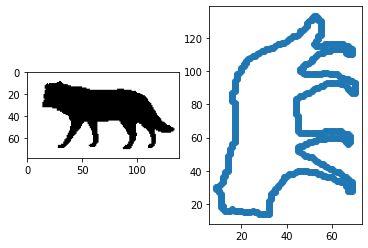

In [ ]:
def graphic_form_contour(name): #O parâmetro a ser passado é o nome de uma das imagens.
    plt.subplot(121)
    plt.imshow(dictionary[name]['form'],'gray') #Usando os dados do dicionário (forma)
    plt.subplot(122)
    plt.scatter(dictionary[name]['contour'][:,0],dictionary[name]['contour'][:,1]) #Usando os dados do dicionário (contorno)
    plt.show()

#Exemplo:
graphic_form_contour('animal11.png')

###Salvando os dados do dicionário em um arquivo .pkl.

In [ ]:
import pickle

pickle_file = open("banco de dados.pkl","wb")
pickle.dump(dictionary, pickle_file)

In [ ]:
pickle_file.close()

###Para testar se o salvamento funcionou.

In [ ]:
with open("banco de dados.pkl","rb") as data_base:
  new_dictionary = pickle.load(data_base)

print(new_dictionary)

#Avaliando o descritor usando KNN

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
k_neighbors = []
for i in range(1,12):
  k_neighbors.append(i)

In [ ]:
previsoes = []
acuracias = []
for k, i in zip(k_neighbors, range(len(k_neighbors))):
  knn = KNeighborsClassifier(n_neighbors=k, metric = 'precomputed')
  knn.fit(distance_matrix, classes) 
  previsoes.append(knn.predict(distance_matrix))
  acuracias.append(100*accuracy_score(classes, previsoes[i]))

In [ ]:
df = pd.DataFrame((zip(k_neighbors, acuracias)), columns=['Valor de K', 'Taxa de acerto (%)'])
df

,Valor de K,Taxa de acerto (%)
0,1,97.959184
1,2,83.673469
2,3,82.653061
3,4,72.448980
4,5,69.387755
5,6,66.326531
6,7,69.387755
7,8,65.306122
8,9,61.224490
9,10,63.265306


In [ ]:
indice = acuracias.index(max(acuracias))
print(f'Melhor k = {k_neighbors[indice]}')

Melhor k = 1


In [ ]:
print(classification_report(classes, previsoes[2]))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.82      0.82      0.82        11
           2       0.64      0.82      0.72        11
           3       0.85      1.00      0.92        11
           4       0.90      0.82      0.86        11
           5       0.80      0.73      0.76        11
           6       0.80      0.73      0.76        11
           7       0.90      0.82      0.86        11
           8       0.83      1.00      0.91        10

    accuracy                           0.83        98
   macro avg       0.84      0.83      0.83        98
weighted avg       0.84      0.83      0.83        98



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(classes, previsoes[2]))

[[ 8  1  0  0  1  0  1  0  0]
 [ 0  9  1  0  0  0  0  0  1]
 [ 0  0  9  1  0  0  0  1  0]
 [ 0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0  9  2  0  0  0]
 [ 0  1  1  0  0  8  1  0  0]
 [ 0  0  2  1  0  0  8  0  0]
 [ 0  0  1  0  0  0  0  9  1]
 [ 0  0  0  0  0  0  0  0 10]]
